William Saunders  
Notebook #3

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('retina')

In [181]:
import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

# Notebook 3: Linear Regression (Diabetes)

## Learning Goal  
The goal of this notebook is to get hands-on experience and intuition about linear regression and regularization. We once again emphasize the difference between fitting and predicting. We will see that it is much more difficult to get good out-of-sample performance on a test set (predicting) than it is to get good in-sample performance on the training set (fitting).

## Overview:

In Notebook 1: __Section II: Machine Learning is difficult__, we explored linear regression in the context of a prediction problem. In this notebook, we'll formally introduce the notion of regression and see how learning and prediction can be improved by introducing regularization. We will focus mainly on simple applications of linear regression: minimizing the mean-square-error (MSE) on the training data (i.e. in-sample error) and see how well we perform on the test data (i.e. out-of-sample error). 


As we discussed in Sec. II of the review, there is a fundamental difference between minimizing the in-sample error and minimizing the out-of-sample error. The underlying reason for this is that the training data may not be representative of the full data distribution. From a Bayesian point of view, as [David MacKay](http://www.inference.org.uk/mackay/) likes to repeat: <i>We can't make predictions without making assumptions.</i> Thus, it is sensible to introduce priors that reflect the fact that we are likely to be undersampled (especially in high dimensions).

We'll consider ordinary least squares regression problem in which the "error function" is defined as the square from the deviation of our linear predictor to the true response. We will supplement this error function with a regularizer that prevents overfitting. From a Bayesian point of view, the regularization can be thought of as a prior on parameters, see Sec VI.
Minimizing the combined in-sample error + regularization terms is the same as the <b> Maximum a posteriori probability (MAP)</b> estimate in Bayesian regression (the parameters at which the posterior probability distribution is peaked). Note that in a true Bayesian approach, we should not use the mode of the posterior but the average over all possible choices of parameters weighted by their posterior probability. In practice, this is  often not done (for computational and practical reasons).



## Least squares linear regression: 

Consider data of the form $(y_i,\mathbf{x}^{(i)})$ where the index $i=1\ldots n$ runs over the number of examples in the training data and $\mathbf{x}^{(i)}$ is a $p$-dimensional feature (row) vector. For notational convenience, it is useful to define the $n \times p$ <b>design matrix</b> $X$ whose rows, $\textbf{x}^{(1)},\cdots, \textbf{x}^{(n)}$, are the examples and columns, $\mathbf{X}_{:,1},\cdots, \mathbf{X}_{:,p}$,  are the measured "features" (i.e. feature predictors). We also denote the $n$-dimensional column vector of sample $i$ as $\mathbf{y}_i$ and the $p$-dimensional column vector of regression parameters $\mathbf{w}\in\mathbb{R}^p$.

For ordinary least square regression (no regularization), we minimize the square loss cost function:

$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\textbf{Xw}-\textbf{y}||_2^2 = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}} \,(\mathbf{Xw}-\mathbf{y})^T(\mathbf{Xw}-\mathbf{y}),
$$

or equivalently, in component form,
$$
\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{min}}   \sum_{i=1}^n (y_i -\mathbf{w}\cdot\mathbf{x}^{(i)})^2.
$$

If rank$(\mathbf{X})=p$, namely, the feature predictors $\mathbf{X}_{:,1},\cdots \mathbf{X}_{:,p}$ are linearly independent, then there exists unique solution to this problem:

$$
\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}
$$

### Exercise 1: ###  
- This choice of parameters correspond the maximum likehood estimate of which Likelihood function? 
    - Gaussian 

- Derive $\hat{\textbf{w}}$ explicitly by solving the least square problem defined above.

I have some of the main steps but there are fine details about the way to work with summations that I'm a  little shaky on so I'm going to do my best and gloss over some of the details. 

Take the derivative of the minimization expression and set equal to zero.

$$\frac{\mathrm{d}}{\mathrm{d}\textbf{w}} \left[ \sum_{i=1}^n (y_i -\mathbf{w}\cdot\mathbf{x}^{(i)})^2 \right] = 0$$



Write in component form for an index $\alpha$:

$$ \frac{\mathrm{d}}{\mathrm{dw}} \left[\sum_{i=1}^n (y_i - \sum_{\alpha} (x_{i\alpha} \mathrm{w}_{\alpha})^2 \right] = 0.$$

Multiply this out for a given index $\alpha =\beta$:

$$ \frac{\mathrm{d}}{\mathrm{dw_{\beta}}} \left[\sum_{i=1}^n (y_i^2 - 2 y_i x_{i\beta} \mathrm{w}_{\beta} + x_{i\beta}^2 \mathrm{w}_{\beta}^2) \right] = 0.$$

Take the derivative:

$$ \sum_i \left[ -2 y_i x_{i\beta} + 2 \mathrm{w}_{\beta} x_{i\beta}^2 \right] = 0. $$

Within an individual $i$ and $\alpha$ index you get $y_i x_{i\beta} = 2 \mathrm{w}_{\beta} x_{i\beta}^2$.   Apply the summations over $\alpha$ and $i$ and write it back into matrix form and you get 

$$ \textbf{X}^T \textbf{y} = \hat{\textbf{w}} \textbf{X}^T \textbf{X}.$$ Rearrange by multiplying both sides by $\left(\textbf{X}^T \textbf{X}\right)^{-1}$ and you get

$$ \hat{\textbf{w}} = \left(\textbf{X}^T \textbf{X}\right)^{-1} \textbf{X}^T \textbf{y}.$$

- Is $\hat{\textbf{w}}$ a biased or an unbiased estimator? In other words, does it give the correct answer as the number of data points goes to infinity ($n \rightarrow \infty$). To answer this question, you may assume i.i.d. (independent, identically distributed) samples $(y_i,\textbf{x}^{(i)})$.
    - Least squares is unbiased because the prior is Gaussian, and as $ n \rightarrow \infty $, the mean of the sample becomes the mean of the distribution. 

- Is $\hat{\textbf{w}}$ still well-defined when rank$(\mathbf{X})<p$? This happens when, for example, $n<p$. 
    - When rank$(\mathbf{X}) < p$, the matrix is singular and not invertible, so $\mathbf{\hat{w}}$ is not unique. This means there are infinitely many solutions, because you have more degrees of freedom than the number of data points, meaning it's possible to fit the data exactly. We discussed what happens in NB 1, and in this case, the model is horribly bad at being predictive because there is 0 bias but very high variance.

- Now imagine the samples are generated in the following manner: $y_i=\textbf{w}_\text{true}\cdot \textbf{x}^{(i)}+\epsilon_i$ where $\epsilon_i\sim\mathcal{N}(0,\sigma^2)$ are i.i.d. Gaussian errors. In statistics, the in-sample risk is defined as
$$
R(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2],
$$
where $\mathbb{E}[\cdots]$ is taken over all i.i.d pairs $(y_i,\textbf{x}^{(i)})$ and $\hat{\textbf{w}}$ is the least squares solution given above. Assuming that $\mathbf{X}$ and $\epsilon_i$ are independent, show that the risk is given by

$$
R(\hat{\textbf{w}}, \textbf{w}_\text{true}) = \sigma^2\frac{p}{n}
$$

Rewrite the quantity $\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}}$ as 
$$ \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{X}^T \mathbf{y} - \mathbf{X}\mathbf{w}_{true}.$$

Substitute $\mathbf{y}$ to get
$$ \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{X}^T (\mathbf{Xw}_{true} + \epsilon) - \mathbf{X}\mathbf{w}_{true}.$$

Multiply out the terms, noticing $\left(\mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{X}^T \mathbf{X} = 1$ to get

$$\mathbf{Xw}_{true} + \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{X}^T \epsilon - \mathbf{Xw}_{true}$$

This gives  

$$R = \frac{1}{n} \mathbb{E} \left[\left(\mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{X}^T \epsilon \right)^2\right]$$

Next, write it as the product of the quantity times its transpose and cancel adjascent terms to return 

$$R = \frac{1}{n} \mathbb{E}\left[\epsilon^T \mathbf{X} \left(\mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{X}^T \epsilon \right]$$

The last part of this comes from diagonalizing the projector $\mathbf{P} = \mathbf{X} \left(\mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{X}^T$, where this allows us to take the expectation of $\epsilon^2$ as $\sigma^2$. Last, the diagonalized matrix has all eigenvalues equal to 1 to $rank(\mathbf{P}) = p$. The result is 

$$ R =  \sigma^2 \frac{p}{n}. $$

- What's the implication of this for fixed $p$ as $n \rightarrow \infty$? How about when $p,n$ scale together?

    - With $p$ fixed, as $n \rightarrow \infty$, the risk tends toward 0, which makes sense, because infinite data decreases the random noise to zero. When $p$ and $n$ scale together, the risk tends toward $\sigma^2$, which implies that the risk is set by the noise in the data. There is a minimum risk that cannot be eliminated.



From Exercise 1, it is clear that the uniqueness of the solution is only guaranteed when rank$(\mathbf{X})>p$. But even so we still may not want to use least squares if $p$ is moderately close to $n$, because its "risk" could be quite poor. One way to deal with this is to  <i> regularize</i>.

We will be concerned with two classes of regularizers: <b> L2-regularization</b> which is often called <b> Ridge-Regression</b> (or <b>Tikhonov regression</b>) and <b> L1-regularization</b> which goes under the name <b>LASSO</b> (and is closely related to <b>Compressed Sensing</b>).


## Ridge Regression
In Ridge-Regression, the regularization penalty is taken to be the L2-norm of the parameters
$$
E_{ridge}= \lambda ||\textbf{w}||_2^2 = \lambda \textbf{w}^T \textbf{w}=\lambda \sum_{\gamma=1}^p w_\gamma w_\gamma.
$$

Thus, the model is fit by minimizing the sum of the in-sample error and the regularization term
$$
\mathbf{w}_{ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} ||\mathbf{X}\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2.
$$
Notice that the parameter $\lambda$ controls how much we weigh the fit and regularization term.

### Exercise 2: ###

- What choice of prior does this correspond to if we are performing a MAP estimate?
    - The MAP estimate with a **Gaussian prior** is equivalent to Ridge regression.

- Show that the solution to Ridge regression is given by $\mathbf{w}_{ridge}= (\mathbf{X}^T\mathbf{X}+\lambda I)^{-1}\mathbf{X}^T \textbf{y}$. 
   

This follows closely my derivation above. First write the minimization equation in component form: 

$$ \mathbf{w}_{ridge} = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} \sum_i \left[ \left( y_i - \mathbf{w} \cdot \mathbf{x^{(i)}} \right)^2 + \lambda \mathbf{w} \cdot \mathbf{w} \right], $$

and then component form for an index $\alpha$:

$$ \mathbf{w}_{ridge} = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} \sum_i \left[ \left( y_i - \sum_{\alpha} x_{i\alpha}w_{\alpha} \right)^2  + \lambda \sum_{\alpha} \mathbf{w_{\alpha}}^2 \right]. $$
 

Multiply out the expression being minimized for a given index $\alpha =\beta$:

$$ \frac{\mathrm{d}}{\mathrm{dw_{\beta}}} \left[\sum_{i=1}^n \left(y_i^2 - 2 y_i x_{i\beta} \mathrm{w}_{\beta} + x_{i\beta}^2 \mathrm{w}_{\beta}^2 + \lambda \mathbf{w_{\beta}}^2\right)  \right] = 0.$$

Take the derivative:

$$ \sum_i \left[ -2 y_i x_{i\beta} + 2 \mathrm{w}_{\beta} x_{i\beta}^2 + 2 \lambda \mathbf{w_{\beta}} \right] = 0. $$

As I did above, re-apply the summations now and write back into matrix form to get 
$$ -\mathbf{X}^T\mathbf{y} + \mathbf{w} \textbf{X}^T \textbf{X} + \mathbf{w} \lambda I = 0.$$\
Rearrange to solve for $\mathbf{w}:

$$\mathbf{w}_{ridge}= (\mathbf{X}^T\mathbf{X}+\lambda I)^{-1}\mathbf{X}^T \textbf{y}.$$

- Express your answer in terms of the Singular Value Decomposition of $\mathbf{X}$.

Substitute the SVD $\mathbf{X} = \mathbf{UDT^{T}}$ in to above to get:

$$ \left[ \left( \mathbf{UDV^T}\right)^\mathrm{T} \left( \mathbf{UDV^T}\right) + \lambda I \right]^{-1} \left(\mathbf{UDV^T}\right)^\mathrm{T} \mathbf{y}.$$

Expand the transposes to get 

$$ \left[ \mathbf{VD^TU^TUDV^T} + \lambda I \right]^{-1} \left(\mathbf{VD^TU^T}\right)^\mathrm{T} \mathbf{y}.$$

Using the identity $\mathbf{D^T = D}$ and by combining the $\mathbf{UU^T}$ term, I get

$$ \left(\mathbf{VD^2V^T} +\lambda I\right)^{-1} \left(\mathbf{VDU^T}\right)  \mathbf{y}, $$

from which I'll combine the $\mathbf{V^TV}$ term and write

$$\mathbf{w}_{ridge} = \mathbf{V} \left(\mathbf{D}^2 + \lambda I \right)^{-1} \mathbf{DU}^\mathrm{T} \mathbf{y}.$$

## LASSO ##

We will also be interested in the case where the penalty is the L1-norm of the parameters (sum of absolute values of parameters). This is called LASSO.
$$
E_{LASSO}= \lambda ||\mathbf{w}||_1 = \lambda \sum_{\gamma=1}^p |w_\gamma| .
$$
In this case, 
$$
\textbf{w}_{LASSO}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} {1 \over 2n} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1.
$$
Note the prefactor $1/(2n)$ in the loss function is not essential to this formulation. We have chosen this form to be consistent with the Scikit-Learn package in Python. As we discussed in the main text, LASSO tends to give sparse solution. In the following we're going to explore these ideas a little bit more.


### Exercise 3: ###  

- What choice of prior does this correspond to if we are performing a MAP estimate?
    - A MAP estimate using a **Laplacian prior** is equivalent to LASSO. 

- In this case, can you derive an analytic expression for $\mathbf{w}_{LASSO}$? Do you have any ideas about how we might be able to efficiently numerically calculate this? 
    - You cannot derive an analytic expression because you cannot take the derivaive of the above equation everywhere. You might want to use gradient descent to calculate this. My initial guess was that you could use a stochastic gradient descent might work, since the stochasticity would help you avoid the places where the derivative blows up. Now I realize that doens't work and there is a whole suite of computational efforts related to minimizing a non-differentiable function subject to a constraint. 

- Do you think LASSO and Ridge Regression will give qualitatively different answers? (Consider the limits $\lambda=0$ and $\lambda = \infty$
    - At $\lambda = 0$, both LASSO and Ridge should give the same solution, which is the linear least squares regression, because $\lambda = 0$ turns off both priors. 
    - For $\lambda = \infty$, both LASSO and Ridge should give exactly 0 for all the parameters, since they converge to their priors.
    - For $\lambda$ in the middle, they will give qualitatively different solutions because there will be some weight on the priors and they have different priors. LASSO is eager to turn parameters off completely whereas Ridge always has every parameter in use. 

## Numerical Experiments with Ridge Regression and LASSO##

We will now perform some numerical experiments with the Diabetes Dataset trying to predict diabetes outcomes one year forward. More information about this data set can be found at <a href="https://archive.ics.uci.edu/ml/datasets/Diabetes">https://archive.ics.uci.edu/ml/datasets/Diabetes</a>. This dataset was described in the famous <a href="http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf">Least Angle Regression</a> paper by Efron, Hastie, Johnstone, Tibshirani as follows:
<blockquote>Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n = 442$ diabetes patients, as well as the
response of interest, a quantitative measure of disease progression one year after baseline.</blockquote>


We start by plotting the weights for each value of $\lambda$ for Ridge Regression and LASSO. This is called a regularization path. We also compare the in-sample and out-of-sample performance between two regressions by examining the $R^2$ coefficient of determination (for detailed definition see <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">here</a>). In terms of linear regression, $R^2$ tells us how well the regression function fits the data. The best attainable fit corresponds to $R^2=1$.


Automatically created module for IPython interactive environment


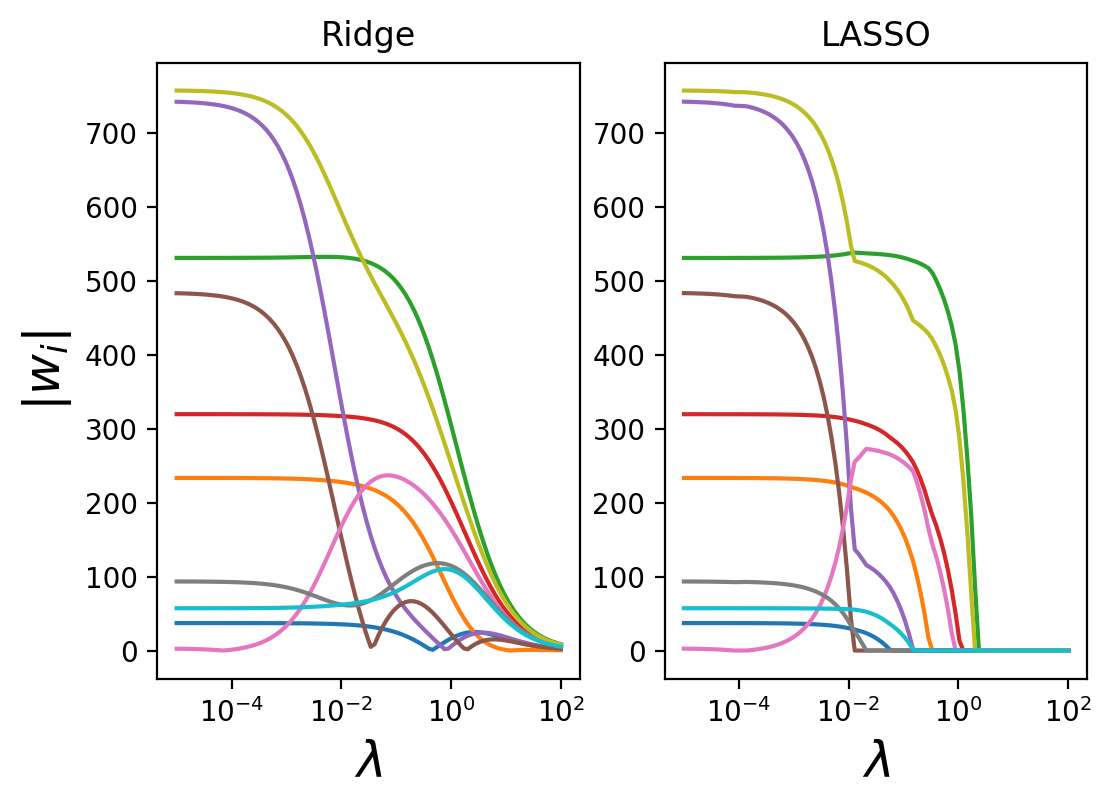

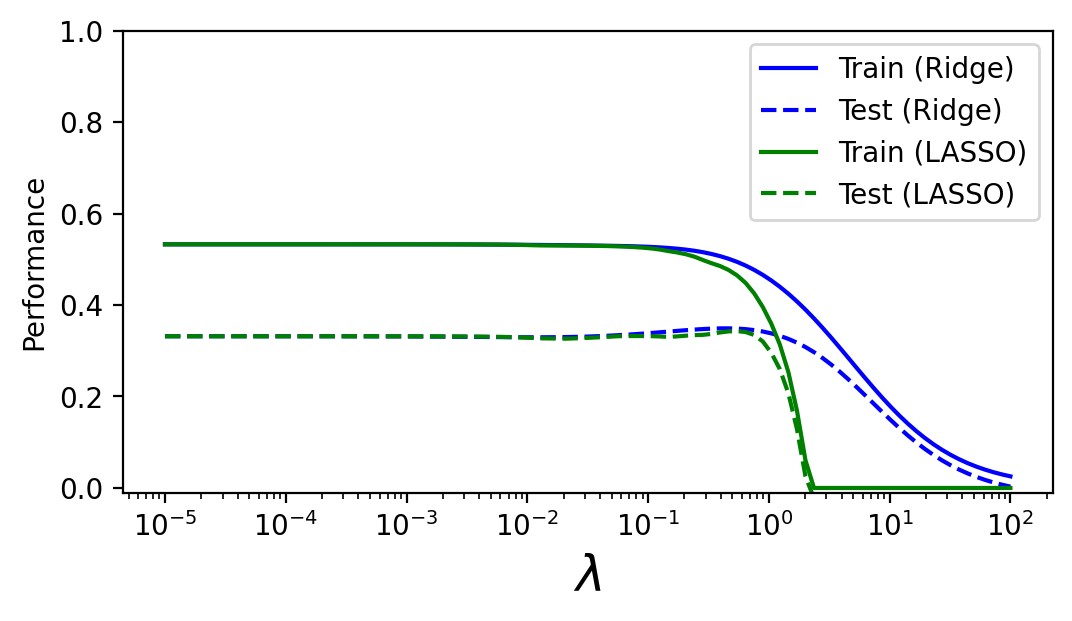

In [178]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=442
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=4)

# Set up Lasso and Ridge Regression models
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()


# Chooose paths
alphas = np.logspace(-5, 2, 100)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

#n_samples = 150
n_samples_train = 400
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.figure(figsize=(6, 4))
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()



# Plot our performance on both the training and test data
plt.figure(figsize=(6, 3))
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()





Automatically created module for IPython interactive environment


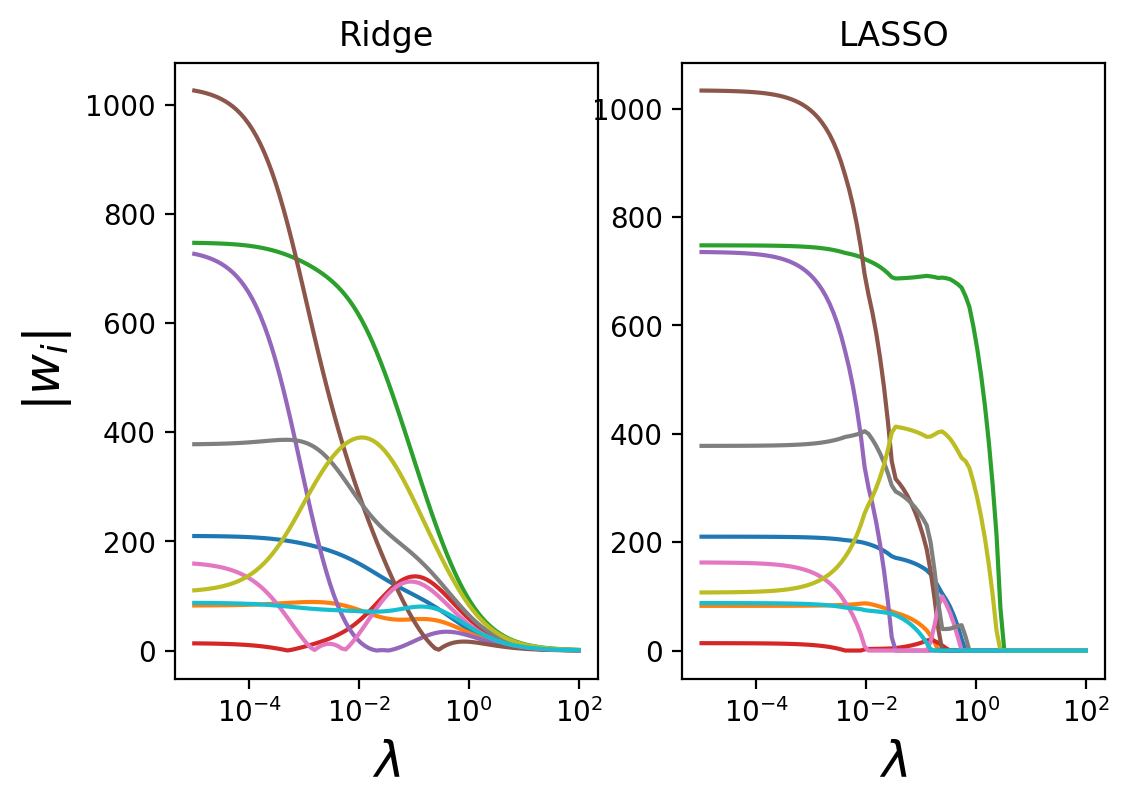

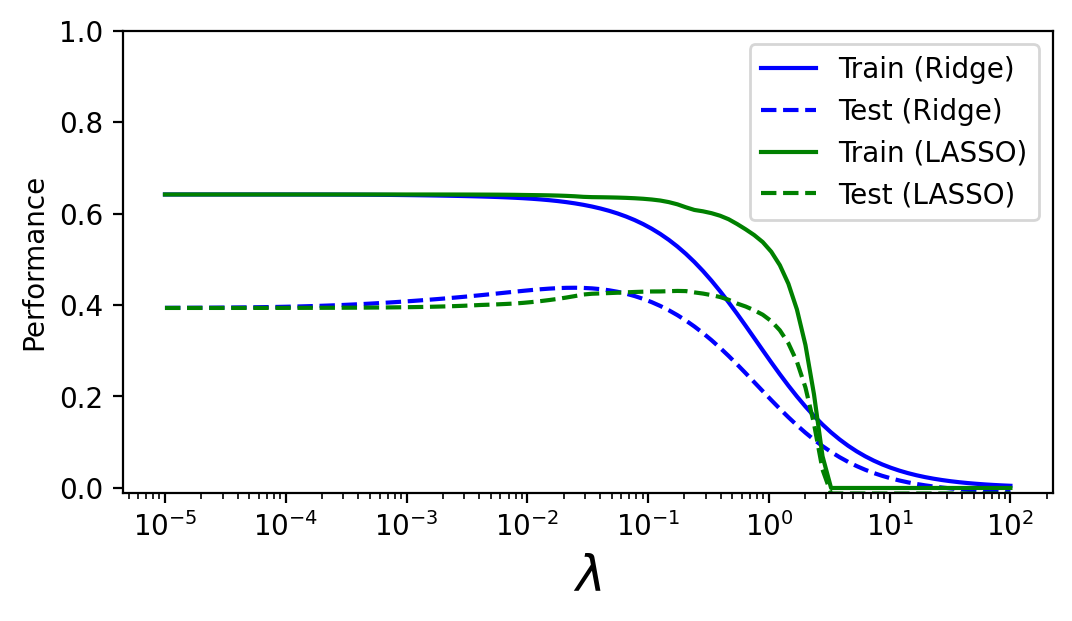

In [188]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=442
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=6)

# Set up Lasso and Ridge Regression models
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()


# Chooose paths
alphas = np.logspace(-5, 2, 100)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

#n_samples = 150
n_samples_train = 42
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.figure(figsize=(6, 4))
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()



# Plot our performance on both the training and test data
plt.figure(figsize=(6, 3))
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()





### Exercise 4: ###  

- What do the points $\lambda=0$ and $\lambda=10^5$ correspond to? Is it strange that the weights are not monotonic in $\alpha$? Why do you think this might be?
    - $\lambda=0$ corresponds to the ordinary least squares case and $\lambda=10^5$ corresponds to the case where all the fitting is based on the priors (heavily biased). For Ridge, this uses the Gaussian prior and for LASSO, this uses the Laplacian prior, but either way, all the values trend toward zero. For LASSO, they are exactly 0, reflecting the goal of enforcing sparsity, whereas for Ridge, they are all  really small.
    - It's not strange that the weights are non-monotonic, because as some fall weights are heavily decreased, other weights are increased, reflecting the balance between prior and data based on the value of $\lambda$. 

- What is the qualitative difference between the LASSO path and Ridge Path? Does this agree with your earlier predictions? Can you make some qualitative argument to rationalize this difference?
    - The major difference is that in LASSO, some weights go to zero quite quickly, but with large enough $\lambda$, they all will become 0. That's the benefit of LASSO--to enforce sparsity in the training. 
    - This agrees with what I predicted earlier. 
    - LASSO is designed to choose simpler models than Ridge, with the ultimate simplest model being all weights equal zero. Some reasons I can think of that you would want to have weights go to zero would be to decrease memory usage and to learn which parameters are irrelevant to the underlying system. 

- How do your answers change when you vary the number of examples and training set size?
    - My first test was to increase the number of examples to 442, the maximum.
        - I divided the 442 samples into 400 for training and 42 for testing and found the test data now perform significantly better than the training data for at all $\lambda$ values. This makes sense because with more data to train on, the model has lower bias, which makes it capable of doing well on the test data. However, small test data means that individual errors can influence the reported performance. 
        - I next divided the 442 samples into 42 for training and 400 for testing and found that the training performance is really for low $\lambda$, whereas the trial performace is poor. This is what I expected because the small training set case is highly biased, which means it tries to fit the noise in the low $\lambda$ case. What's interesting about this case is that you can get an $R^2$ of about 0.45 for Ridge and LASSO even with really small training data, by choosing the right $\lambda$ value. This highlights the power of regularization to prevent bias from destroying the predictive power. 
    - With a smaller number of examples, the predictive power tends to just get worse.

## A brief note about convexity

In Sec. VI of the review, we briefly discussed convexity. Here's a quick refresher: Recall that a set $C\subseteq\mathbb{R}^n$ is called <i> convex </i> if any $x,y\in C$ and $t\in [0,1]$, 
$$
tx+(1-t)x \in C.
$$
In other words, every line segments joining $x,y$ lies entirely in $C$. 

A function $f:\mathbb{R}^n\rightarrow \mathbb{R}$ is called <i> convex </i> if its domain dom$(f)$ is a convex set and for any $x,y\in$dom$(f)$ and $t\in [0,1]$, 

$$
f(tx+(1-t)y)\le tf(x)+(1-t)f(y).
$$
In other words, the function lies below the line segment joining $f(x)$ and $f(y)$. This function $f$ is called <b> strictly convex </b> if this inequality holds strictly for $x\neq y$ and $t\in(0,1)$. 

Why is convexity important?  <b> For convex functions, any local minimizer is a global minimizer</b>. Algorithmically, this means that in the minimization (optimization) procedure, as long as we're "going down the hill" and agree to stop when we can't go any further, then we've hit the global minimum. In addition to this, there's a menagerie of beautiful theory regarding convex duality and optimality, which gives us a way of understanding the solutions even before solving the problem itself. We refer interested readers to  <a href="http://web.stanford.edu/~boyd/cvxbook/">Boyd and Vandenberghe book on Convex Optimization</a>.


Coming back to our regularization examples, a simple inspection reveals that both LASSO and Ridge regression are convex in $w$. What's more, Ridge is actually a <i> strictly convex </i> problem (assuming $\lambda>0$) due to presence of L2 penality. In fact, this is always true regardless of $X$ and so the ridge regression solution you worked out (presumably) in Exercise 2 is always well-defined.

In contrast, LASSO is not always strictly convex and hence by convexity
theory, it need not have a unique solution. The LASSO solution is unique under general conditions, for example, when $X$ has columns in <i> general position </i> (see <a href="https://arxiv.org/abs/1206.0313"> Tibshirani 2013</a>). To mitigate this, one can define a modified problem called the <a href="https://web.stanford.edu/~hastie/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf">elastic net</a> such that the function we want to minimize is always strictly convex:

$$
\underset{\mathbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1 + \delta||\mathbf{w}||_2^2,
$$
where $\lambda,\delta\ge 0$ are regularization parameters. Now aside from uniqueness of the solution, the elastic net combines some of the desirable properties (e.g. prediction) of ridge regression with the sparsity properties of the LASSO. In the following exercise, you're going to explore a little bit about elastic net.

### Exercise 4: ###  

- Play with the parameters $\lambda$ and $\delta$, when would you expect sparse solutions?
    - If $\delta$ is small, then this converges to the standard LASSO case, which has lots of sparse solutions. If $\delta$ is large, then this converges to the Ridge regression case, which has no sparsity. So I would expect sparsity with small $\delta$.

- Plot the regularization path of elastic net. How does it depend on $\lambda$ and $\delta$?

For plotting this, I'm using the scikit-learn ElasticNet function, which minimizes this function 

$$ ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda \lambda_{ratio} ||\mathbf{w}||_1 + \lambda (1 - \lambda_{ratio}) \delta||\mathbf{w}||_2^2,
$$
where $\lambda_{ratio}$ controls the tradeoff between $\lambda$ and $\delta$. 

I'm going to plot the regularization paths for $\lambda_{ratio}$ for a variety of $\lambda$ values.

In [189]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples=442
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
enet = linear_model.ElasticNet()

# Chooose paths
alphas = np.logspace(-2.5, 1, 10)
l1_ratios = np.linspace(0, 1, 100)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

#n_samples = 150
n_samples_train = 400
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()

train_errors_enet = list()
test_errors_enet = list()


# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
coefs_enet=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
    for l in l1_ratios:
        enet.set_params(alpha=a, l1_ratio=l)
        enet.fit(X_train, y_train)
        coefs_enet.append(enet.coef_)
        train_errors_enet.append(enet.score(X_train, y_train))
        test_errors_enet.append(enet.score(X_test, y_test))
    
    

Automatically created module for IPython interactive environment


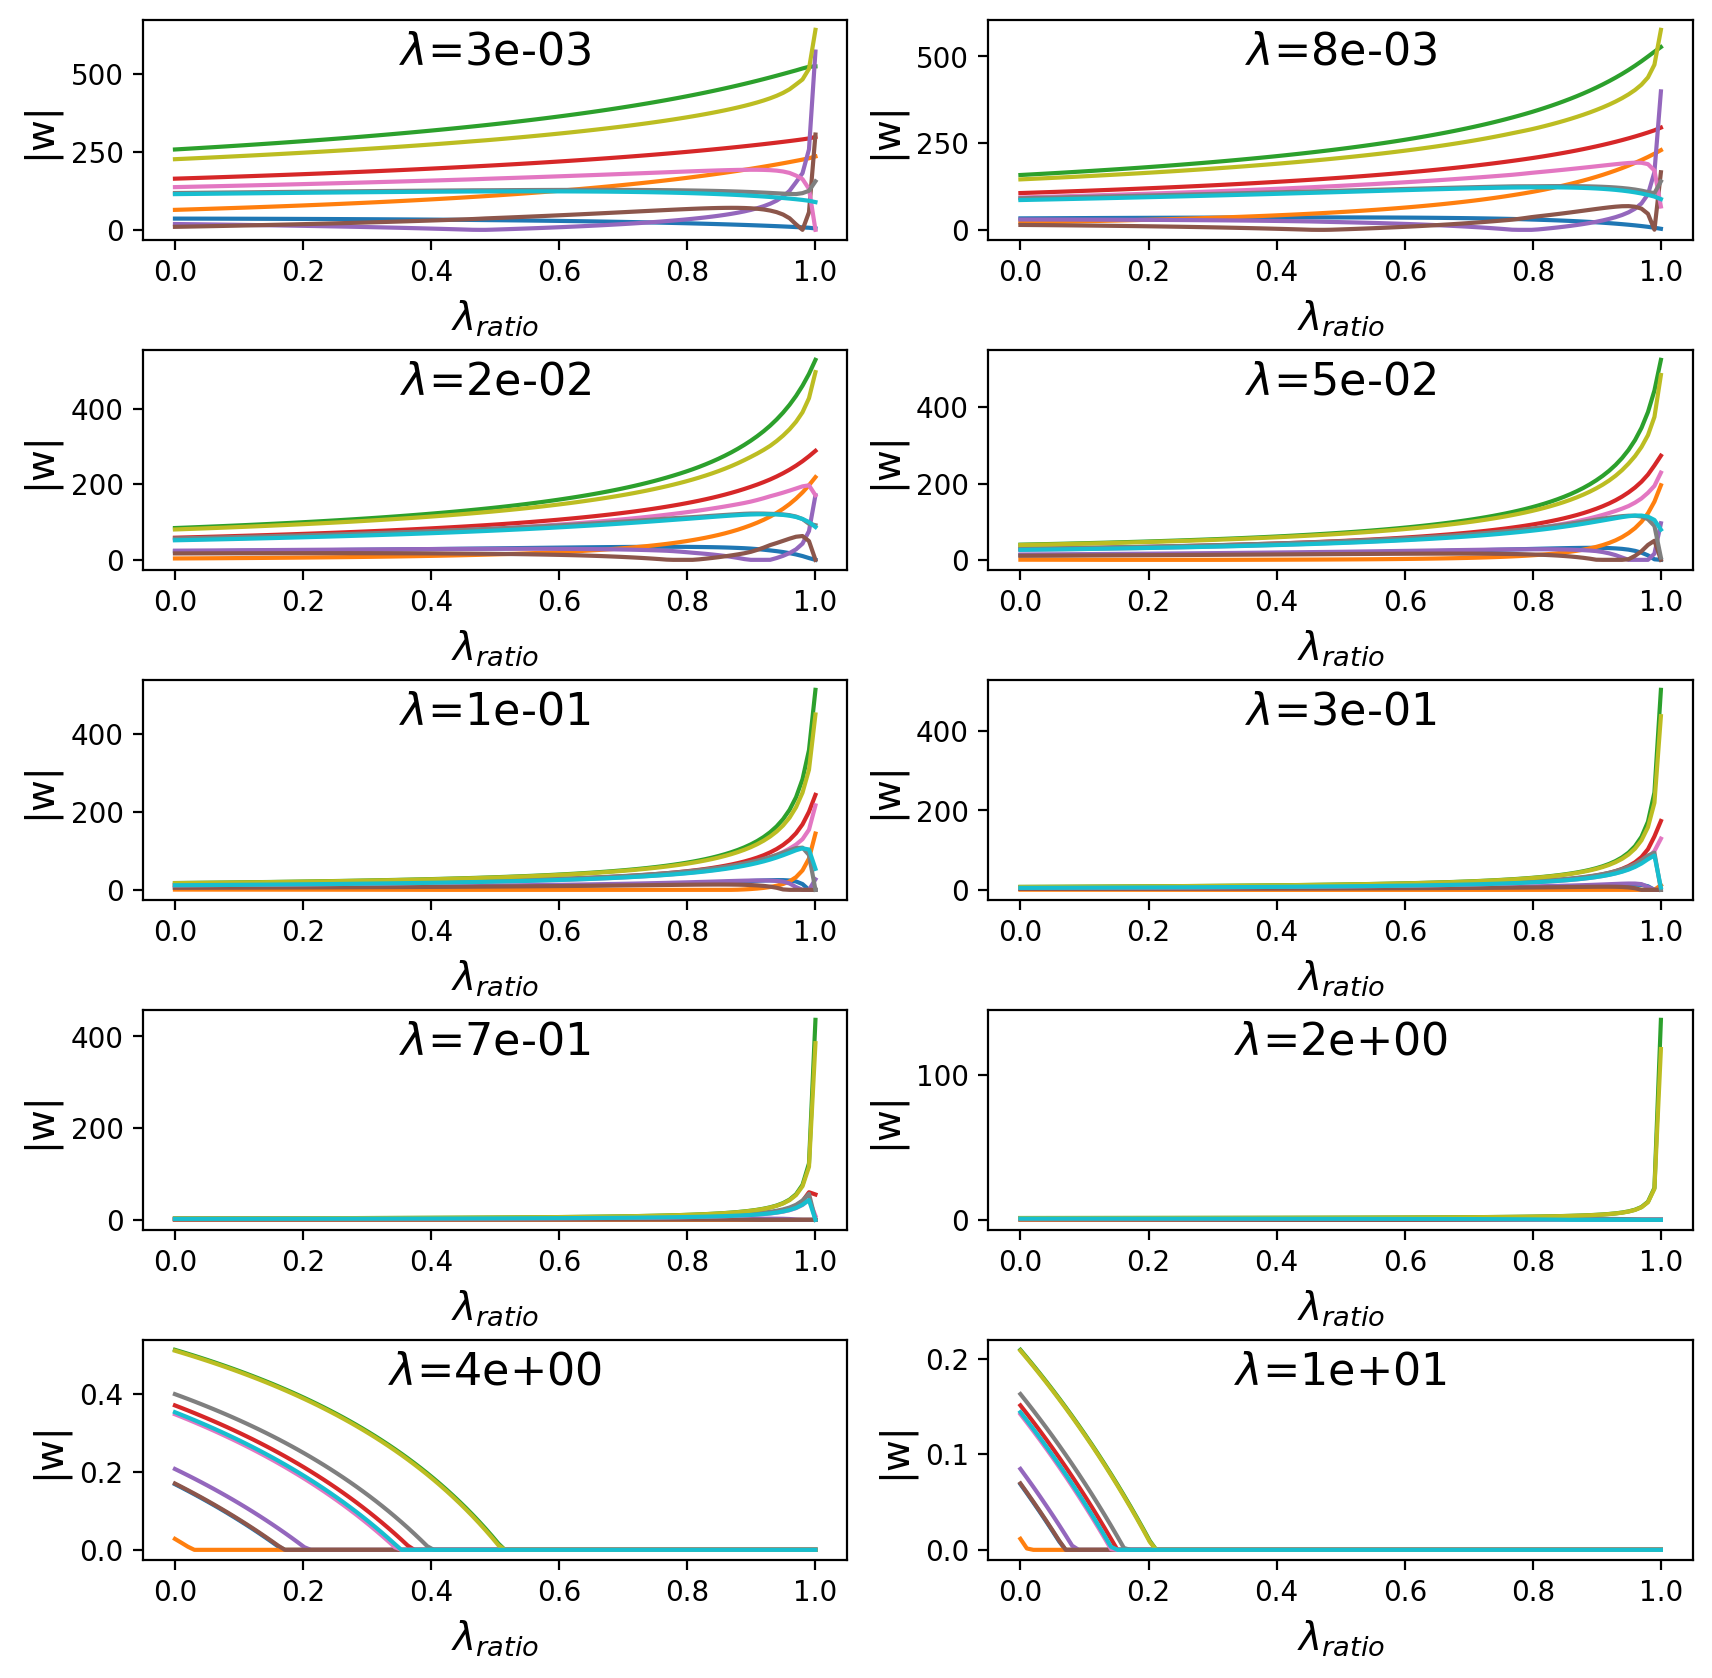

In [190]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5, 2, figsize=(10, 10))

for (i, ax) in zip(range(10), [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
    
    ax.plot(l1_ratios, np.abs(coefs_enet[100*i:100*i+100]))
    ax.set_xlabel(r'$\lambda_{ratio}$',fontsize=14)
    ax.set_ylabel(r'|w|',fontsize=14)
    #ax.set_title('%.2f'%alphas[i], fontsize=18)
    ax.text(0.5, 0.8, '$\lambda$=%.e'%alphas[i], horizontalalignment='center', transform=ax.transAxes, \
            fontsize=16)
    
fig.subplots_adjust(hspace=0.5)
plt.show()

- How does it depend on $\lambda$ and $\delta$?
    - The $\lambda_{ratio} = 0$ case is always pure Ridge and $\lambda_{ratio} = 1$ case is alwasy pure LASSO, and for all these values of $\lambda$, the right edge of the graph has some weights going to 0, as expected. What's interesting is that for the values of $\lambda$ that are near where the best performance is (~0.01 or so), it's possible to set $\lambda_{ratio}$ just slightly lower than 1 and preserve some of the sparsity. It doesn't take much, however, to kill off the sparsity. With another hyperparameter, you could look for better predictive power than with either method alone. 
    - The obvious downside to this is now you have 2 hyperparameters, which can make it more challenging to optimize. 

- Derive the analytic solution of this elastic net problem. Check your answer by looking at two limiting cases ($\lambda\rightarrow 0$ and $\delta\rightarrow 0$). Does this agree with what you found previously?

### End-of-notebook questions ###  
<ul>

<li> Can you explain the difference between in-sample and out-of-sample performance? Is out-of-sample error usually larger than in-sample error? Does this depend on regularization? Recall in Exercise 1, we defined the in-sample risk as 

$$
R_{in}(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2],
$$ 
where $\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}$ is the least square solution and $\textbf{w}_\text{true}$ is the true parameter vector used to generate all samples. Following the same notation and assumption, now imagine if we're given a new data point $\textbf{x}_0$ independently drawn from the predictor distribution $\mathcal{P}$. We can define the out-of-sample risk as 
$$
R_{out} =\mathbb{E}_{\textbf{x}^{(0)}\sim\mathcal{P}}\mathbb{E}_{(y_i,\textbf{x}_i)}[(\hat{\textbf{w}}\cdot \textbf{x}_0 -\textbf{w}_\text{true}\cdot \textbf{x}_0)^2],
$$
with the expectation value taken not only over the training samples $(y_i,\textbf{x}_i)$ but also over the predictor distribution $\mathcal{P}$ that generates the unseen sample $\textbf{x}^{(0)}$. One can actually show that $R_{out}\ge R_{in}$ under mild assumptions. This makes sense intuitively since it's usually harder to make prediction on unseen samples than to fit the samples given. You can numerically verify this by assuming a predictor distribution, say, $\mathcal{N}(0,\Sigma)$.
</ul>

- The out-of-sample error is usually larger than the in-sample error but not all the time. 
    - For the case I ran with a large training set but small test set, often the out-of-sample performance was much better than the in-sample performance. I suspect this is due to random variation in the test dataset. I tried shuffling $\mathbf{X}$ and $\mathbf{y}$ the same way and re-ran this a number of different times. The test prerformances are equally better and worse than the trial performances. From this I take away that the only case where the in-sample performance is worse than the out-of-sample performance is where $p \sim n_{test}$. 
    - In the case with a small training set and a large test set, the out-of-sample performance is much worse than the in-sample performance because training on a small dataset highly biases the model. In this case, the regularization noticibly improves performance. 
    